In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r"C:\Users\ADMIN\Downloads\train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
print(f'shape = {df.shape}\n'
      f'size = {df.size}\n'
      f'dimension = {df.ndim}')

shape = (891, 12)
size = 10692
dimension = 2


In [13]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
680,681,0,3,"Peters, Miss. Katie",female,NaN,0,0,330935,8.1375,NaN,Q
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9000,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
526,527,1,2,"Ridsdale, Miss. Lucy",female,50.0,0,0,W./C. 14258,10.5000,NaN,S


In [15]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:

df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


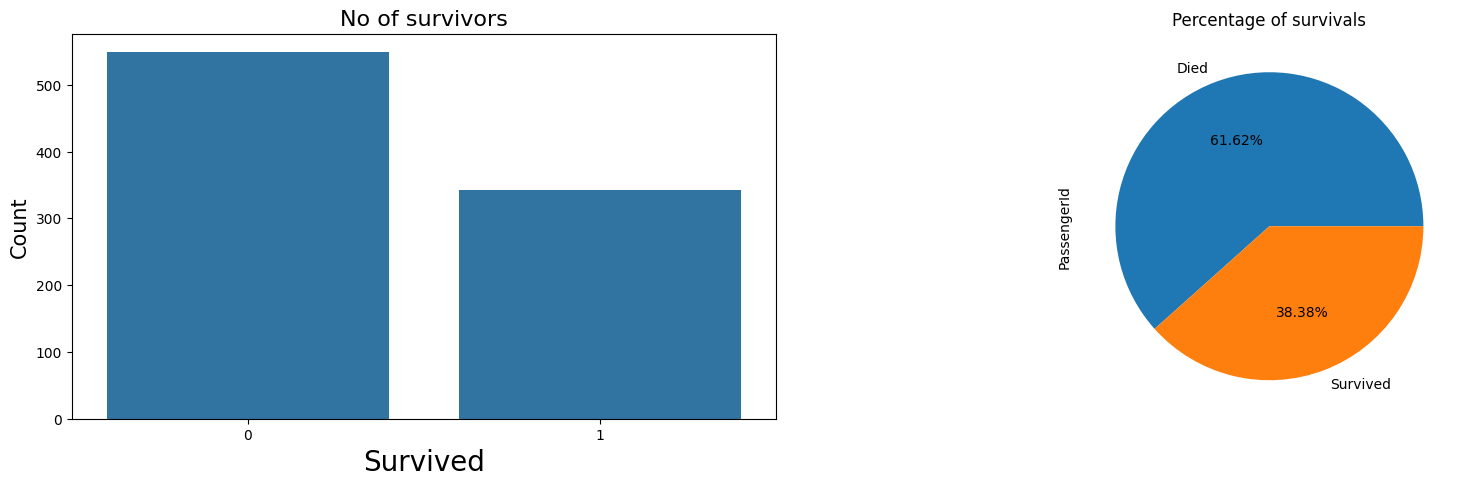

<Figure size 640x480 with 0 Axes>

In [54]:
#How many people survived? 

fig, axs = plt.subplots(1,2, figsize = (20, 5))
ax = sns.countplot(x= 'Survived', data = df,ax= axs[0]);
ax.set_xlabel('Survived' ,fontsize =20 )
ax.set_ylabel('Count',fontsize =15)
axs[0].set_title('No of survivors',fontsize = 16)
ax2 = df.groupby('Survived')['PassengerId'].count().plot.pie(labels = ['Died','Survived'],
                                                            autopct = '%.2f%%')
axs[1].set_title('Percentage of survivals')
plt.show()
plt.tight_layout()

Sex       female  male
Survived              
0             81   468
1            233   109


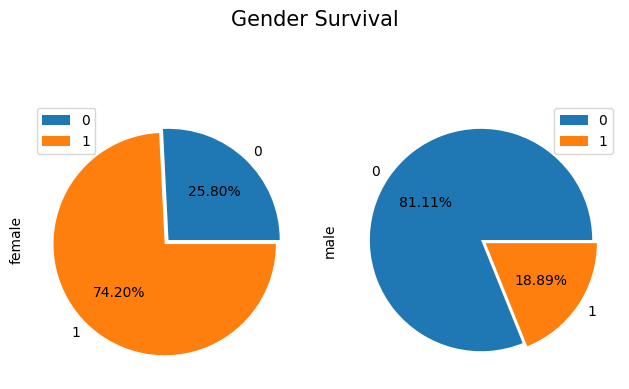

In [76]:
#Gender Based Survival:-
gbs = pd.crosstab(df['Survived'],df['Sex'])
print(gbs)
gbs = gbs.plot(kind = 'pie',subplots = True,autopct = '%.2f%%',explode=[0,0.05])
fig = gbs[0].get_figure()
colors = ["#AA96DA", "#C5FAD5"]  
labels = ['Died' , 'Survived']
fig.tight_layout()
fig.suptitle('Gender Survival', fontsize=15);

[None, None, None, None]

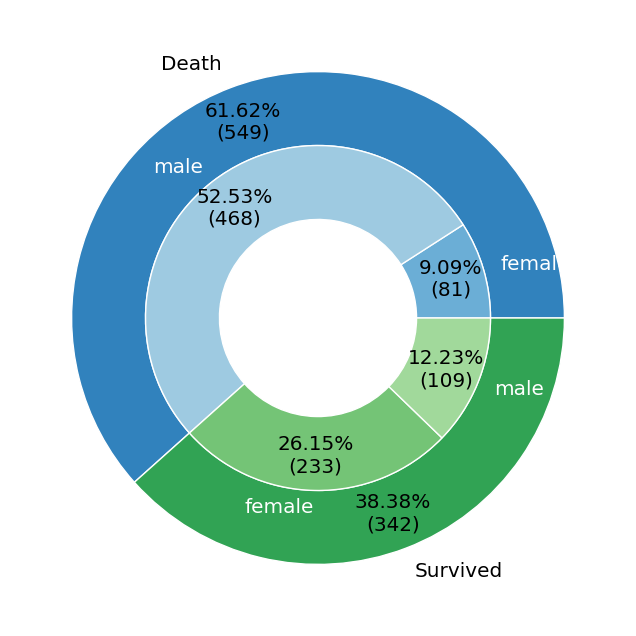

In [89]:
outer = df.groupby('Survived').count().reset_index()
inner = df.groupby(['Survived','Sex']).count()
fig, ax = plt.subplots(figsize=(20,8))
size = 0.3

color = plt.get_cmap("tab20c") 
outer_colors = color(np.arange(2)*8)
inner_colors = color([1, 2, 9, 10])
# Outer pie: Death vs Survived
ax.pie(
    outer['PassengerId'],
    labels=outer['Survived'].replace({0:'Death', 1:'Survived'}),
    colors=outer_colors,
    autopct=lambda p: f'{p:.2f}%\n({(p/100)*outer["PassengerId"].sum():.0f})',
    radius=1,
    pctdistance=0.85,
    wedgeprops=dict(width=size, edgecolor='w'),
    textprops={'size':'x-large'}
)

# Inner pie: Gender breakdown
texts = ax.pie(
    inner['PassengerId'],
    labels=inner.index.get_level_values(1),
    colors=inner_colors,
    autopct=lambda p: f'{p:.2f}%\n({(p/100)*inner["PassengerId"].sum():.0f})',
    radius=1-size,
    pctdistance=0.8,
    wedgeprops=dict(width=size, edgecolor='w'),
    textprops={'size':'x-large'}
)[1]

# Make inner labels white for visibility
[text.set_color('white') for text in texts]



In [97]:
df['Title'] = [i.split(".")[0].split(",")[1] for i in df['Name']]

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5888\418284763.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['Title'], data = df, palette = 'Paired');


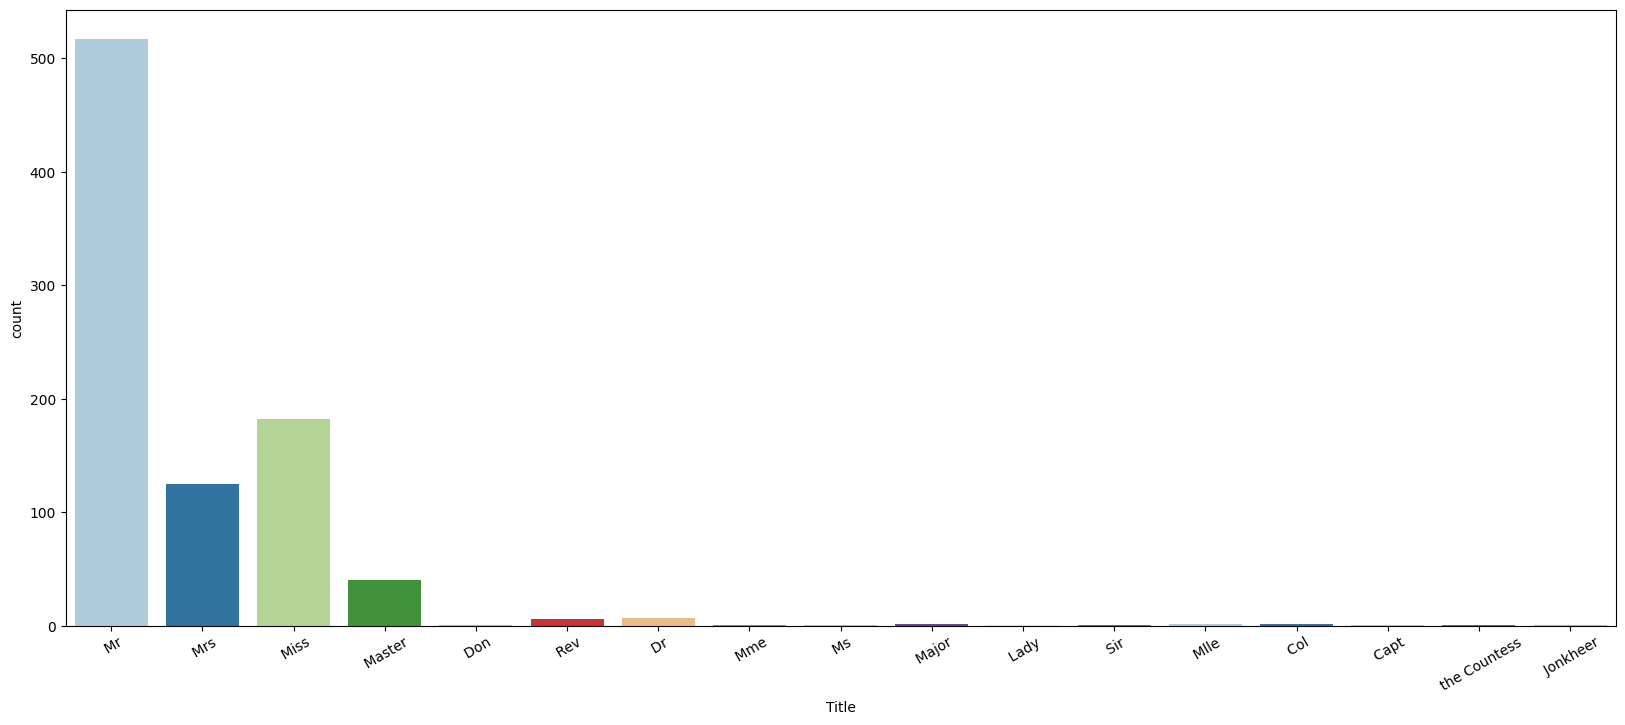

In [96]:
#professional wise 
plt.figure(figsize=(20, 8))
sns.countplot(x = df['Title'], data = df, palette = 'Paired');
plt.xticks(rotation = 30);

In [99]:
#Life stage and age 
df['LifeStage'] = 'NaN'
df.loc[df['Age'] <= 1, 'LifeStage'] = 'Infant' 
df.loc[(2 <= df['Age']) & (df['Age'] <= 4), 'LifeStage'] = 'Todler' 
df.loc[(5 <= df['Age']) & (df['Age'] <= 12), 'LifeStage'] = 'Child' 
df.loc[(13 <= df['Age']) & (df['Age'] <= 19), 'LifeStage'] = 'Teen'
df.loc[(20 <= df['Age']) & (df['Age'] <= 39), 'LifeStage'] = 'Adult'  
df.loc[(40 <= df['Age']) & (df['Age'] <= 59), 'LifeStage'] = 'Middle Age Adult' 
df.loc[df['Age'] >= 60, 'LifeStage'] = 'Senior Adult'

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5888\1357094342.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LifeStage', data = df, palette = 'turbo_r',


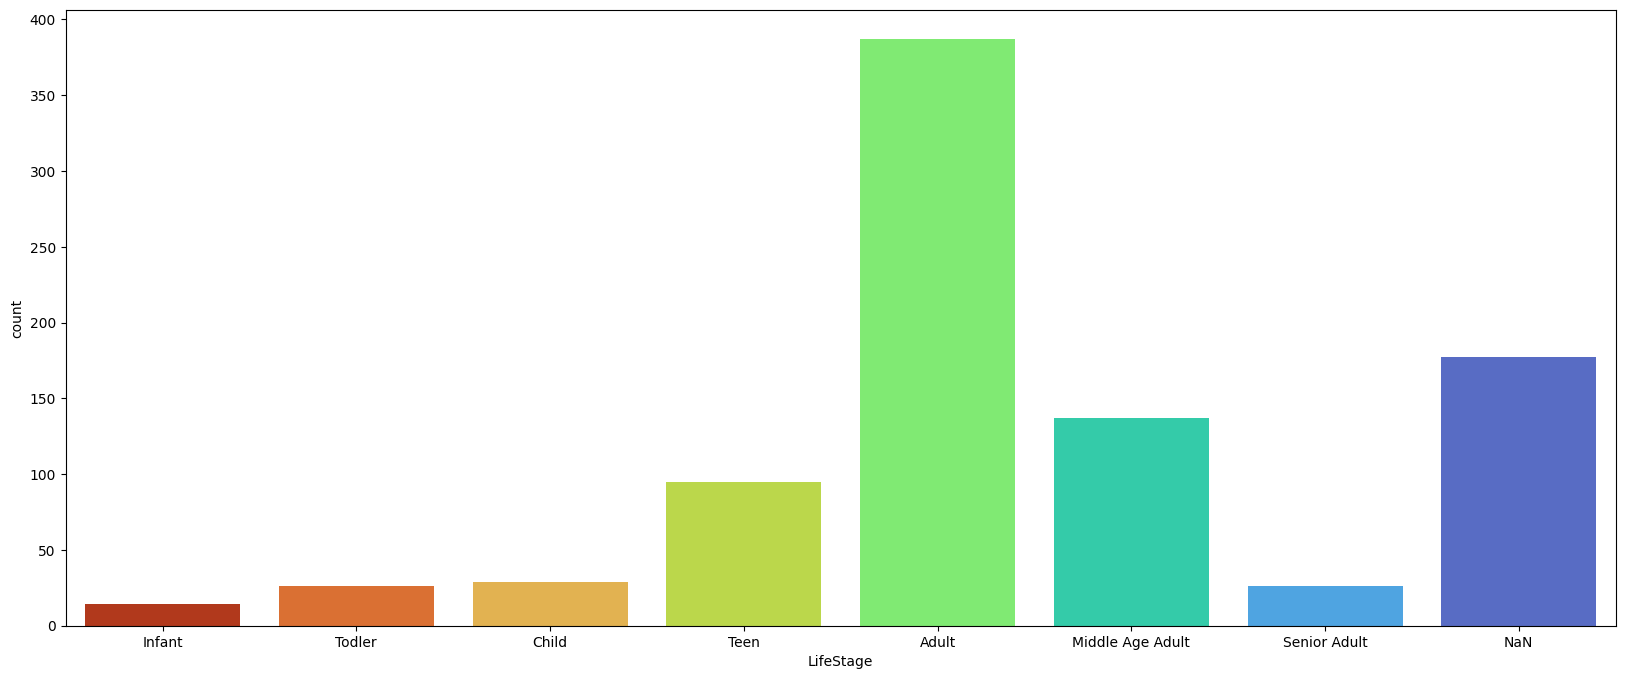

In [101]:
plt.figure(figsize=(20, 8))
sns.countplot(x='LifeStage', data = df, palette = 'turbo_r',
              order = ['Infant', 'Todler', 'Child', 'Teen', 'Adult', 
                       'Middle Age Adult', 'Senior Adult', 'NaN']);